# Practical = 8  (EM Algorithm)
##  Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

### EM(Expectation maximization) algorithm

This is clustering technique in which first some part of whole data taken as the n-clusters where n is number of cluster given by user and then algorithm cheack that all the element or datapoint are included in our cluster or not
and if all element are not included then it again steps with incresing their
range of cluster(expectation maximization) and then again cheack that all datapoint or included or not.This process repeat untill all datapoint are not included in n-clustering.After this clustering is completed.

In [1]:
import numpy as np, pandas as pd, math
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("data.csv")
data.head(5)

,sepallength,sepalwidth,petallength,petalwidth,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
unlabeled_data=data.iloc[:,:-1]
unlabeled_data.head(5)

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


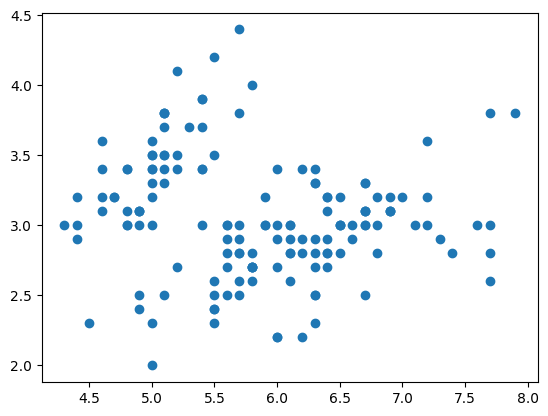

In [4]:
x=unlabeled_data["sepallength"]
y=unlabeled_data["sepalwidth"]
plt.scatter(x,y)

In [5]:
def plotdata(data,numberoflabel,title):
    for i in range(numberoflabel):
        x=unlabeled_data[unlabeled_data['labels']==i]['sepallength']
        y=unlabeled_data[unlabeled_data['labels']==i]['petallength']
        plt.scatter(x,y,c=f'C{i}')
    plt.title(title)
    plt.plot()

[]

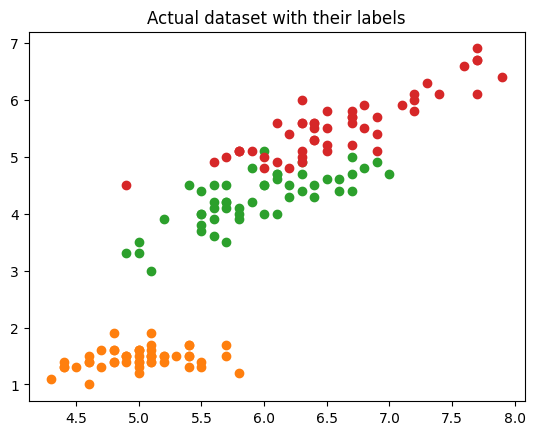

In [6]:
x1=data[data['type']=='Iris-setosa']['sepallength']
y1=data[data['type']=='Iris-setosa']['petallength']
plt.scatter(x1,y1,c='C1')
x2=data[data['type']=='Iris-versicolor']['sepallength']
y2=data[data['type']=='Iris-versicolor']['petallength']
plt.scatter(x2,y2,c='C2')
x3=data[data['type']=='Iris-virginica']['sepallength']
y3=data[data['type']=='Iris-virginica']['petallength']
plt.scatter(x3,y3,c='C3')
plt.title("Actual dataset with their labels")
plt.plot()

### Gaussian mixture clustering

Gaussian mixture clustering include clustering of element using varience or standered deviation and mean of element.Accoring to this clustering group of similar element having minimum standered deviation or near to zero.Thus this model group all element such that standred deviation and varience should be minimum.

In [7]:
gmm=GaussianMixture(n_components=3)
gmm.fit(unlabeled_data)
labels=gmm.predict(unlabeled_data)
unlabeled_data['labels']=labels

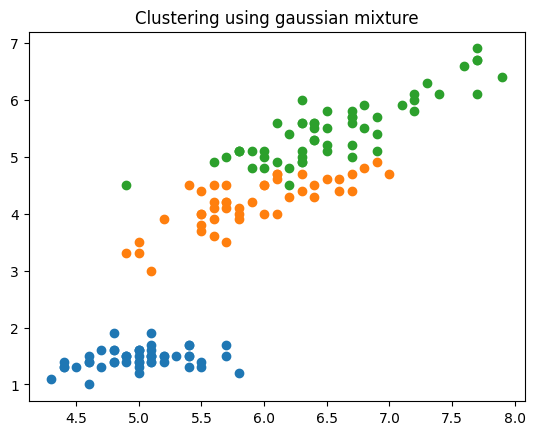

In [8]:
plotdata(unlabeled_data,3,"Clustering using gaussian mixture")

### K-means algorithm for clustering

K-means clustering another technique of clustering where first k-centroid are difined where k is number of cluster in which we wan't to divide given element
and then for each element are assign to it's nearest centroid.After allocation of all point.Then calculate centre for all element in each cluster and then allocate that point as centroid and then again calculate the nearest centroid for each datapoint and then again cheack centre until centre and centroid of all k centroid not become equal...

In [9]:
unlabeled_data=data.iloc[:,:-1]

In [10]:
model=KMeans(n_clusters=3)
model.fit(unlabeled_data)
labels=model.predict(unlabeled_data)
unlabeled_data['labels']=labels

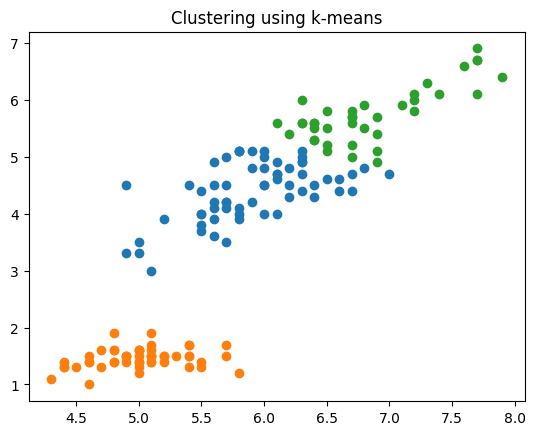

In [11]:
plotdata(unlabeled_data,3,"Clustering using k-means")


There is so supervised parameter to measure accurecy of them but we can observe their clustering by graph